In [26]:
import h5py
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
f = h5py.File("../data/size_scaling.hdf5", "r")

In [28]:
my_times = xr.DataArray(f["my_times"][:, :], dims=("l", "chi"), \
             coords={"l": f["l"][:], "chi": f["chi"][:]}, name="my_times")
my_times_df = my_times.to_dataframe()
print(my_times_df.head())

       my_times
l chi          
2 2    0.000612
  3    0.000239
  4    0.000225
  5    0.000183
  6    0.000178


In [29]:
quimb_times_df = pd.DataFrame({"l": f["l"][:], "quimb_times": f["quimb_times"][:]})
quimb_times_df.set_index("l", inplace=True)
print(quimb_times_df.head())

   quimb_times
l             
2     0.000746
3     0.000974
4     0.001451
5     0.003624
6     0.004046


In [33]:
my_times_df = my_times_df.reset_index().pivot(index="l", columns="chi", values="my_times")

<Axes: xlabel='l'>

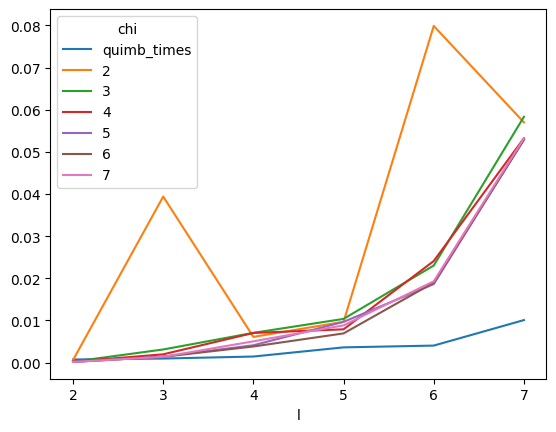

In [35]:
fig, ax = plt.subplots()
quimb_times_df.plot(ax=ax)
my_times_df.plot(ax=ax)